## COMP5870M - Image Analysis
### Coursework 1

## Georgios Kortsaridis
## Student ID: 201273201 / Username: sc18gk 

In [ ]:
import numpy as np
import scipy as sp
from scipy import ndimage
import matplotlib.pyplot as plt  # for imshow
import matplotlib.colors as colors
import matplotlib.patches as patches
from scipy.cluster import vq     # for k-means and vq
import random

%matplotlib inline

Patch (12, 12)
X (20000, 144)
(55696, 35)


(-0.5, 235.5, 235.5, -0.5)

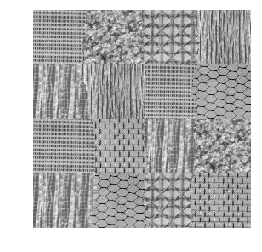

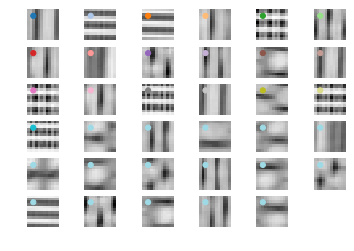

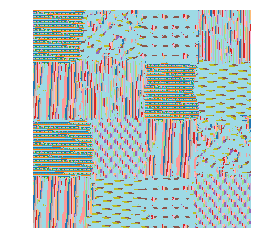

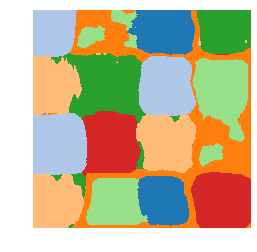

In [6]:
im = plt.imread('patchwork1.jpg')
im = im/255    # convert to float in interval [0 1]
gim = np.mean(im[:,:,0:3],axis=2)    # find mean of RGB to create a 2D grayscale image (could be RGBA)
#gim = im

plt.imshow(gim, cmap='gray')
plt.axis('off')

# perform local contrast normlisation
sgim = ndimage.gaussian_filter(gim,4)    # smooth the intensity image ('reflect' at boundaries)
dev = (gim-sgim)
V = ndimage.gaussian_filter(dev*dev,4)    # smooth the variance
gim = dev / np.maximum(np.sqrt(V), 0.1)

# Gray-levels are no longer in the interval [0 1], so provide normalisation to imshow
plt.figure()
norm = colors.Normalize(vmin=gim.min()/2, vmax=gim.max()/2)
plt.imshow(gim, cmap='gray', norm=norm)
plt.axis('off')

N = 12      # size of patch
K = 35       # number of prototypes for kmeans
P = 20000   # number of randomly selected patches
K2 = 7
M = 20


R = gim.shape[0]    # number of rows in image
C = gim.shape[1]    # number of columns in image

X = np.zeros((P,N*N),dtype=float) # initialise array for random patches

for i in range(0, P):
    r = random.randint(0,R-N)
    c = random.randint(0,C-N)
    patch = gim[r:r+N,c:c+N]     #Returns a N*N subimage
    X[i,:] = np.reshape(patch,(-1))
 
    
print("Patch",np.shape(patch))
print("X",np.shape(X))
    
codebook, distortion = vq.kmeans(X,K)

spn = np.ceil(np.sqrt(K))    # size of subplot display
norm = colors.Normalize(vmin=codebook.min(), vmax=codebook.max())    # set gray range from minimum to maximum
for i in range(0,K):
    plt.subplot(spn,spn,i+1)
    plt.imshow(np.reshape(codebook[i,:],(N,N)),cmap='gray',norm=norm)
    plt.gca().add_patch(patches.Circle((2,2), radius=1, color=plt.cm.tab20(i)))
    plt.axis('off')    # turn off the axes
    
X = np.zeros(((R-N)*(C-N),N*N),dtype=float)   # initialise array for all patches
i=0
for r in range(0,R-N):
    for c in range(0,C-N):
        X[i,:] = np.reshape(gim[r:r+N,c:c+N],(-1))
        i=i+1

code, dist = vq.vq(X,codebook)
code = np.reshape(code,(R-N,C-N))    # reshape the 1D code array into the original 2D image shape

# to give each label a unique colour, turn off normalisation in order to index directly into discrete colour map
plt.figure()
norm = colors.NoNorm()
plt.imshow(code, cmap='tab20', norm=norm)
plt.axis('off')    # turn off the axes



X = np.zeros(((R-M)*(C-M),K))
i=0
for r in range(0, R-M):
    for c in range(0, C-M):
        subimage = code[r:r+M,c:c+M]
        flatened = np.reshape(subimage,(-1))
        X[i,:] = (np.bincount(flatened, None, K));
        i = i+1

print(np.shape(X))

codebook, distortion = vq.kmeans(X,K2)
code, dist = vq.vq(X,codebook)
code = np.reshape(code,(R-M,C-M))    # reshape the 1D code array into the original 2D image shape

# to give each label a unique colour, turn off normalisation in order to index directly into discrete colour map
plt.figure()
norm = colors.NoNorm()
plt.imshow(code, cmap='tab20', norm=norm)
plt.axis('off')    # turn off the axes


Patch (12, 12)
X (20000, 144)
(48841, 20)


(-0.5, 220.5, 220.5, -0.5)

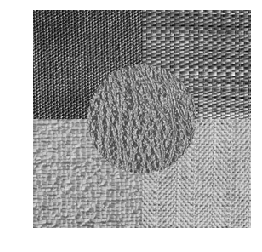

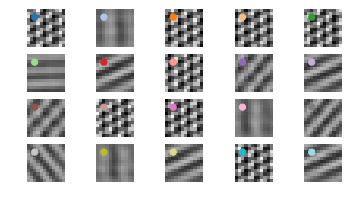

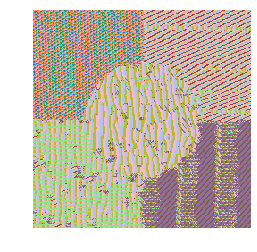

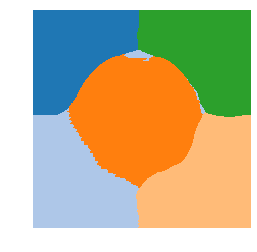

In [3]:
im = plt.imread('patchwork2.pbm')
im = im/255    # convert to float in interval [0 1]
gim = np.mean(im[:,:,0:3],axis=2)    # find mean of RGB to create a 2D grayscale image (could be RGBA)
#gim = im

plt.imshow(gim, cmap='gray')
plt.axis('off')

# perform local contrast normlisation
sgim = ndimage.gaussian_filter(gim,4)    # smooth the intensity image ('reflect' at boundaries)
dev = (gim-sgim)
V = ndimage.gaussian_filter(dev*dev,4)    # smooth the variance
gim = dev / np.maximum(np.sqrt(V), 0.1)

# Gray-levels are no longer in the interval [0 1], so provide normalisation to imshow
plt.figure()
norm = colors.Normalize(vmin=gim.min()/2, vmax=gim.max()/2)
plt.imshow(gim, cmap='gray', norm=norm)
plt.axis('off')

N = 12      # size of patch
K = 20       # number of prototypes for kmeans
P = 20000   # number of randomly selected patches
K2 = 5
M = 35


R = gim.shape[0]    # number of rows in image
C = gim.shape[1]    # number of columns in image

X = np.zeros((P,N*N),dtype=float) # initialise array for random patches

for i in range(0, P):
    r = random.randint(0,R-N)
    c = random.randint(0,C-N)
    patch = gim[r:r+N,c:c+N]     #Returns a N*N subimage
    X[i,:] = np.reshape(patch,(-1))

    
print("Patch",np.shape(patch))
print("X",np.shape(X))
    
codebook, distortion = vq.kmeans(X,K)

spn = np.ceil(np.sqrt(K))    # size of subplot display
norm = colors.Normalize(vmin=codebook.min(), vmax=codebook.max())    # set gray range from minimum to maximum
for i in range(0,K):
    plt.subplot(spn,spn,i+1)
    plt.imshow(np.reshape(codebook[i,:],(N,N)),cmap='gray',norm=norm)
    plt.gca().add_patch(patches.Circle((2,2), radius=1, color=plt.cm.tab20(i)))
    plt.axis('off')    # turn off the axes
    
X = np.zeros(((R-N)*(C-N),N*N),dtype=float)   # initialise array for all patches
i=0
for r in range(0,R-N):
    for c in range(0,C-N):
        X[i,:] = np.reshape(gim[r:r+N,c:c+N],(-1))
        i=i+1

code, dist = vq.vq(X,codebook)
code = np.reshape(code,(R-N,C-N))    # reshape the 1D code array into the original 2D image shape

# to give each label a unique colour, turn off normalisation in order to index directly into discrete colour map
plt.figure()
norm = colors.NoNorm()
plt.imshow(code, cmap='tab20', norm=norm)
plt.axis('off')    # turn off the axes



X = np.zeros(((R-M)*(C-M),K))
i=0
for r in range(0, R-M):
    for c in range(0, C-M):
        subimage = code[r:r+M,c:c+M]
        flatened = np.reshape(subimage,(-1))
        X[i,:] = (np.bincount(flatened, None, K));
        i = i+1

print(np.shape(X))

codebook, distortion = vq.kmeans(X,K2)
code, dist = vq.vq(X,codebook)
code = np.reshape(code,(R-M,C-M))    # reshape the 1D code array into the original 2D image shape

# to give each label a unique colour, turn off normalisation in order to index directly into discrete colour map
plt.figure()
norm = colors.NoNorm()
plt.imshow(code, cmap='tab20', norm=norm)
plt.axis('off')    # turn off the axes


Patch (19, 19)
X (20000, 361)
(213444, 50)


(-0.5, 461.5, 461.5, -0.5)

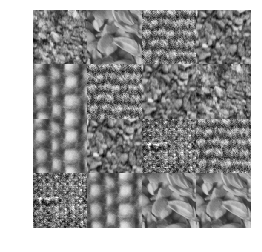

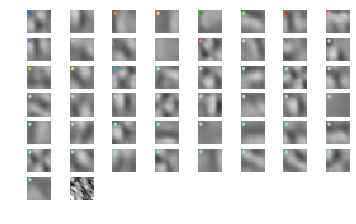

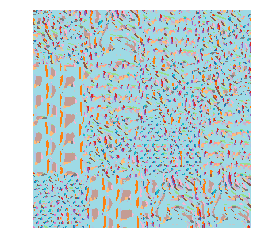

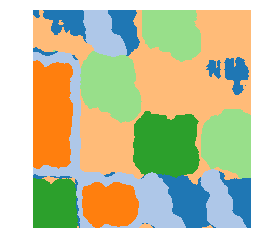

In [10]:
im = plt.imread('patchwork6.png')
im = im/255    # convert to float in interval [0 1]
#gim = np.mean(im[:,:,0:3],axis=2)    # find mean of RGB to create a 2D grayscale image (could be RGBA)
gim = im

plt.imshow(gim, cmap='gray')
plt.axis('off')

# perform local contrast normlisation
sgim = ndimage.gaussian_filter(gim,4)    # smooth the intensity image ('reflect' at boundaries)
dev = (gim-sgim)
V = ndimage.gaussian_filter(dev*dev,4)    # smooth the variance
gim = dev / np.maximum(np.sqrt(V), 0.1)

# Gray-levels are no longer in the interval [0 1], so provide normalisation to imshow
plt.figure()
norm = colors.Normalize(vmin=gim.min()/2, vmax=gim.max()/2)
plt.imshow(gim, cmap='gray', norm=norm)
plt.axis('off')

N = 19      # size of patch
K = 50       # number of prototypes for kmeans
P = 20000   # number of randomly selected patches
K2 = 6
M = 50


R = gim.shape[0]    # number of rows in image
C = gim.shape[1]    # number of columns in image

X = np.zeros((P,N*N),dtype=float) # initialise array for random patches

for i in range(0, P):
    r = random.randint(0,R-N)
    c = random.randint(0,C-N)
    patch = gim[r:r+N,c:c+N]     #Returns a N*N subimage
    X[i,:] = np.reshape(patch,(-1))

    
print("Patch",np.shape(patch))
print("X",np.shape(X))
    
codebook, distortion = vq.kmeans(X,K)

spn = np.ceil(np.sqrt(K))    # size of subplot display
norm = colors.Normalize(vmin=codebook.min(), vmax=codebook.max())    # set gray range from minimum to maximum
for i in range(0,K):
    plt.subplot(spn,spn,i+1)
    plt.imshow(np.reshape(codebook[i,:],(N,N)),cmap='gray',norm=norm)
    plt.gca().add_patch(patches.Circle((2,2), radius=1, color=plt.cm.tab20(i)))
    plt.axis('off')    # turn off the axes
    
X = np.zeros(((R-N)*(C-N),N*N),dtype=float)   # initialise array for all patches
i=0
for r in range(0,R-N):
    for c in range(0,C-N):
        X[i,:] = np.reshape(gim[r:r+N,c:c+N],(-1))
        i=i+1

code, dist = vq.vq(X,codebook)
code = np.reshape(code,(R-N,C-N))    # reshape the 1D code array into the original 2D image shape

# to give each label a unique colour, turn off normalisation in order to index directly into discrete colour map
plt.figure()
norm = colors.NoNorm()
plt.imshow(code, cmap='tab20', norm=norm)
plt.axis('off')    # turn off the axes



X = np.zeros(((R-M)*(C-M),K))
i=0
for r in range(0, R-M):
    for c in range(0, C-M):
        subimage = code[r:r+M,c:c+M]
        flatened = np.reshape(subimage,(-1))
        X[i,:] = (np.bincount(flatened, None, K));
        i = i+1

print(np.shape(X))

codebook, distortion = vq.kmeans(X,K2)
code, dist = vq.vq(X,codebook)
code = np.reshape(code,(R-M,C-M))    # reshape the 1D code array into the original 2D image shape

# to give each label a unique colour, turn off normalisation in order to index directly into discrete colour map
plt.figure()
norm = colors.NoNorm()
plt.imshow(code, cmap='tab20', norm=norm)
plt.axis('off')    # turn off the axes


Patch (19, 19)
X (20000, 361)
[0.06831928 0.06819001 0.06944246 ... 0.05264026 0.04864054 0.04788609]
(213444, 50)


(-0.5, 461.5, 461.5, -0.5)

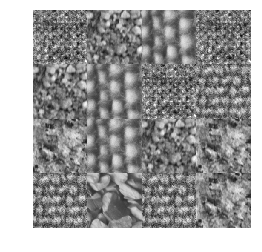

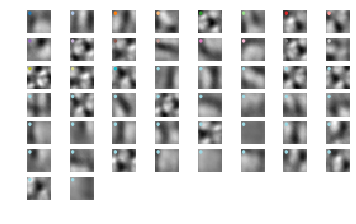

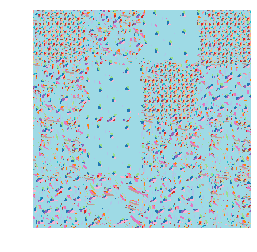

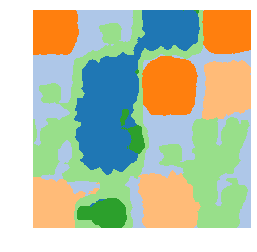

In [18]:
im = plt.imread('patchwork7.png')
im = im/255    # convert to float in interval [0 1]
#gim = np.mean(im[:,:,0:3],axis=2)    # find mean of RGB to create a 2D grayscale image (could be RGBA)
gim = im

plt.imshow(gim, cmap='gray')
plt.axis('off')

# perform local contrast normlisation
sgim = ndimage.gaussian_filter(gim,4)    # smooth the intensity image ('reflect' at boundaries)
dev = (gim-sgim)
V = ndimage.gaussian_filter(dev*dev,4)    # smooth the variance
gim = dev / np.maximum(np.sqrt(V), 0.1)

# Gray-levels are no longer in the interval [0 1], so provide normalisation to imshow
plt.figure()
norm = colors.Normalize(vmin=gim.min()/2, vmax=gim.max()/2)
plt.imshow(gim, cmap='gray', norm=norm)
plt.axis('off')

N = 19      # size of patch
K = 50       # number of prototypes for kmeans
P = 20000   # number of randomly selected patches
K2 = 6
M = 50


R = gim.shape[0]    # number of rows in image
C = gim.shape[1]    # number of columns in image

X = np.zeros((P,N*N),dtype=float) # initialise array for random patches

for i in range(0, P):
    r = random.randint(0,R-N)
    c = random.randint(0,C-N)
    patch = gim[r:r+N,c:c+N]     #Returns a N*N subimage
    X[i,:] = np.reshape(patch,(-1))

    
print("Patch",np.shape(patch))
print("X",np.shape(X))
    
codebook, distortion = vq.kmeans(X,K)


spn = np.ceil(np.sqrt(K))    # size of subplot display
norm = colors.Normalize(vmin=codebook.min(), vmax=codebook.max())    # set gray range from minimum to maximum
for i in range(0,K):
    plt.subplot(spn,spn,i+1)
    plt.imshow(np.reshape(codebook[i,:],(N,N)),cmap='gray',norm=norm)
    plt.gca().add_patch(patches.Circle((2,2), radius=1, color=plt.cm.tab20(i)))
    plt.axis('off')    # turn off the axes
    
X = np.zeros(((R-N)*(C-N),N*N),dtype=float)   # initialise array for all patches
i=0
for r in range(0,R-N):
    for c in range(0,C-N):
        X[i,:] = np.reshape(gim[r:r+N,c:c+N],(-1))
        i=i+1

code, dist = vq.vq(X,codebook)
print(dist)

code = np.reshape(code,(R-N,C-N))    # reshape the 1D code array into the original 2D image shape

# to give each label a unique colour, turn off normalisation in order to index directly into discrete colour map
plt.figure()
norm = colors.NoNorm()
plt.imshow(code, cmap='tab20', norm=norm)
plt.axis('off')    # turn off the axes



X = np.zeros(((R-M)*(C-M),K))
i=0
for r in range(0, R-M):
    for c in range(0, C-M):
        subimage = code[r:r+M,c:c+M]
        flatened = np.reshape(subimage,(-1))
        X[i,:] = (np.bincount(flatened, None, K));
        i = i+1

print(np.shape(X))

codebook, distortion = vq.kmeans(X,K2)
code, dist = vq.vq(X,codebook)
code = np.reshape(code,(R-M,C-M))    # reshape the 1D code array into the original 2D image shape

# to give each label a unique colour, turn off normalisation in order to index directly into discrete colour map
plt.figure()
norm = colors.NoNorm()
plt.imshow(code, cmap='tab20', norm=norm)
plt.axis('off')    # turn off the axes